# Logist Regression Project

In this project we'll be working with a fake advertising dataset, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We'll try to create a model that will predict whether or not they will click on an AD based on the features of that user.

This dataset contains the followings features:

* `Daily Time Spent on Site`: consumer time on site in minutes
* `Age`: cutomer age in years
* `Area Income`: Avg. Income of geographical area of consumer
* `Daily Internet Usage`: Avg. minutes a day consumer is on the internet
* `Ad Topic Line`: Headline of the advertisement
* `City`: City of consumer
* `Male`: Whether or not consumer was male
* `Country`: Country of consumer
* `Timestamp`: Time at which consumer clicked on Ad or closed window
* `Clicked on Ad`: 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Get the Data

In [4]:
ad_data = pd.read_csv('../../datasets/advertising.csv')

In [5]:
ad_data.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
895,80.99,26,35521.88,207.53,Centralized clear-thinking Graphic Interface,Melissastad,1,Belarus,2016-06-10 03:56:41,0
312,75.55,22,41851.38,169.40,Upgradable even-keeled challenge,New Amanda,0,Taiwan,2016-02-19 07:29:30,1
476,78.76,24,46422.76,219.98,Reactive interactive protocol,Joanntown,1,Austria,2016-01-08 08:08:47,0
266,70.58,26,56694.12,136.94,Proactive next generation knowledge user,Lake David,0,Algeria,2016-02-26 09:18:48,1
886,44.40,53,43073.78,140.95,Phased zero-defect portal,Mariahview,1,France,2016-06-30 00:43:40,1


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## EAD

Here we'll explore our data using seaborn library, in order to understand the correlation between the variables.

In [11]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Age')

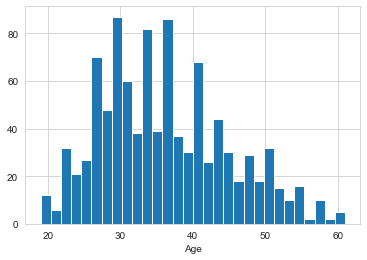

In [13]:
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

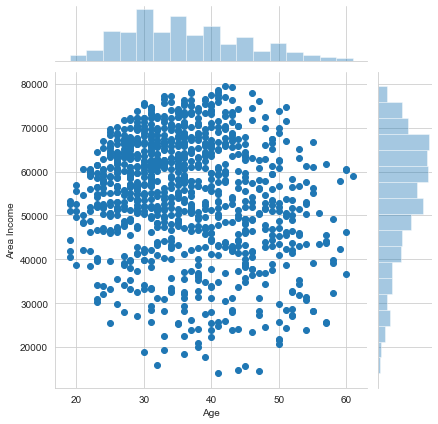

In [15]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

We can observe that is not a high correlation between localization and age.

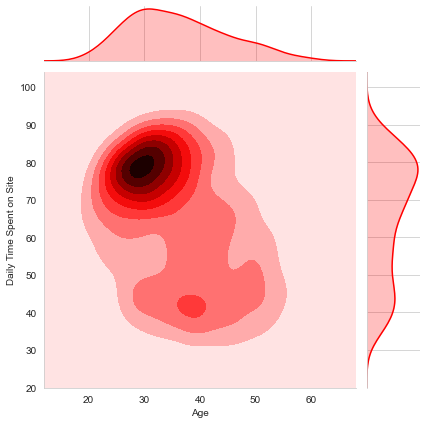

In [17]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, color='red', kind='kde')

However, when we observe the correlation between Age and Daily Time Spend on Site, wen can note that people younger usually spend more time on the website.

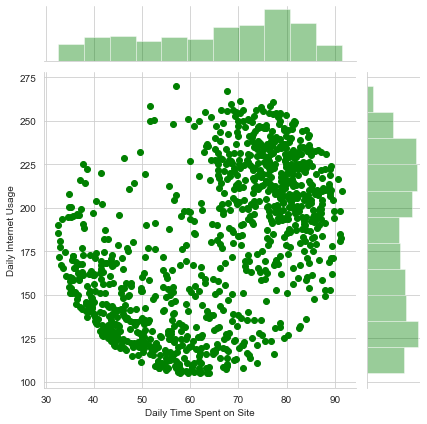

In [18]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

Analyzing the plot above,  we can see that the greater the average time spent on the internet, the greater the access on the web site.

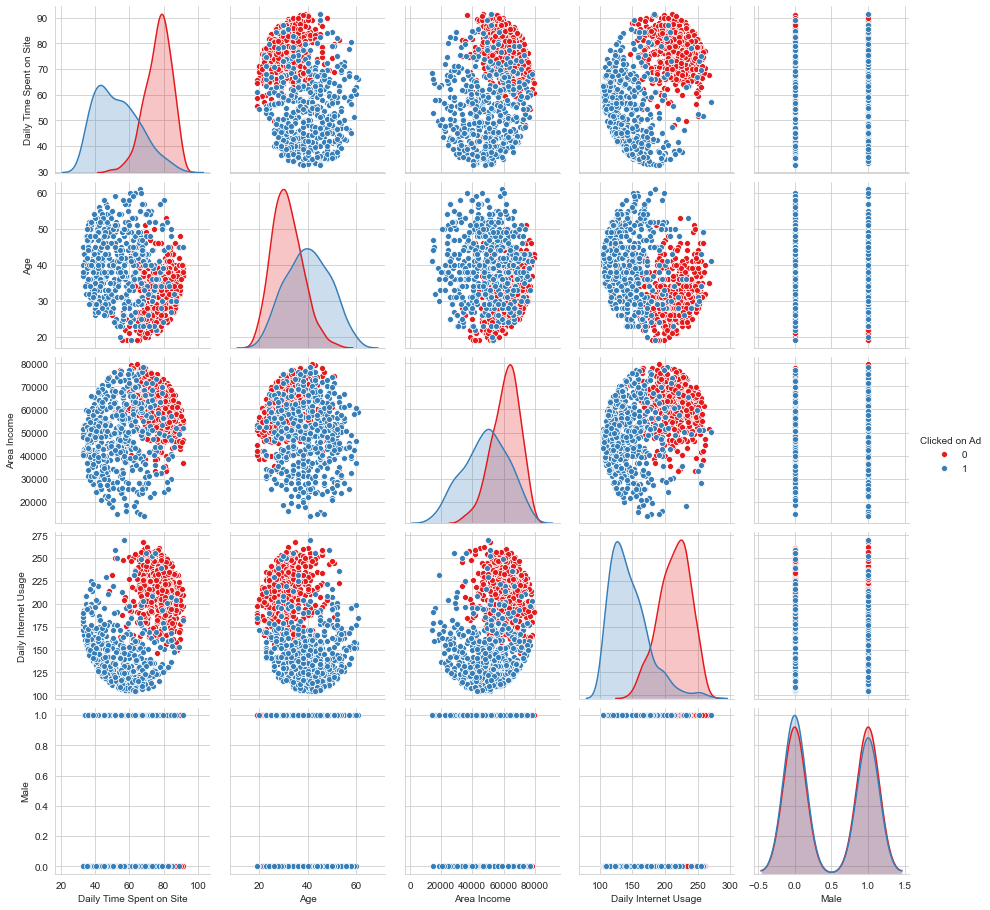

In [29]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='Set1')

Analyzing the plot above we can understand the correlation existing between all features based on variable Clicked on Ad

## Logistic Regression

Now we'll train test split, and train our model

In [33]:
from sklearn.model_selection import train_test_split

We use just some attributes

In [41]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90       144
          1       0.94      0.86      0.90       156

avg / total       0.90      0.90      0.90       300



In [49]:
print(confusion_matrix(y_test, predictions))

[[136   8]
 [ 22 134]]
